In [2]:
import pandas as pd
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tcc_ceds_music.csv',sep=',')

## Análise exploratória

In [4]:
df["topic"].value_counts()

sadness       6096
violence      5710
world/life    5420
obscene       4882
music         2303
night/time    1825
romantic      1524
feelings       612
Name: topic, dtype: int64

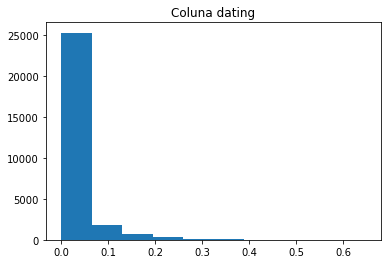

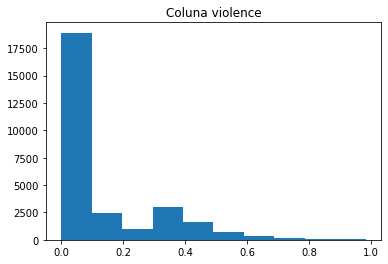

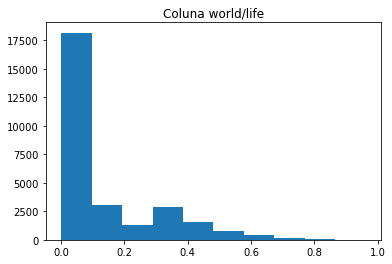

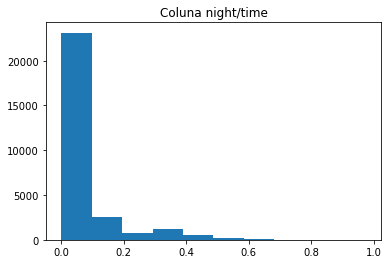

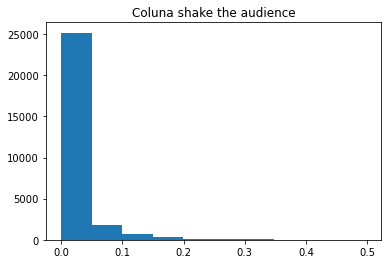

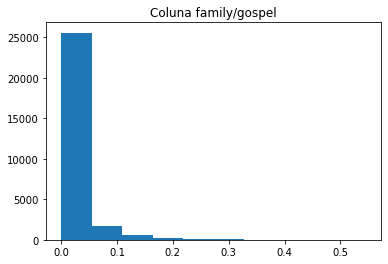

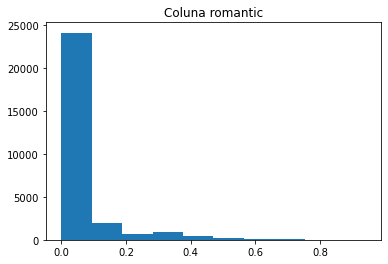

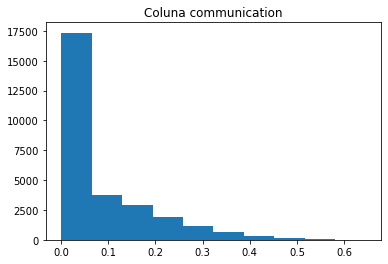

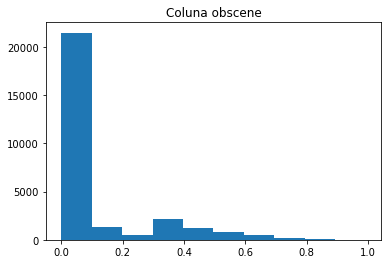

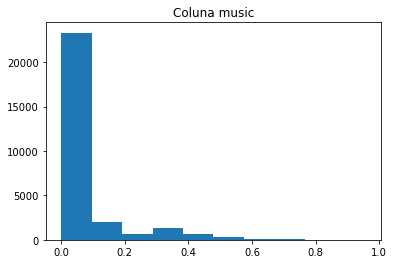

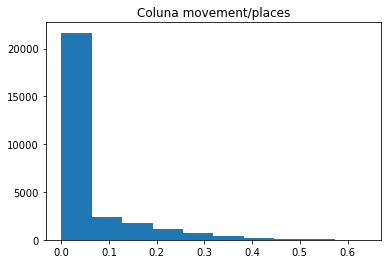

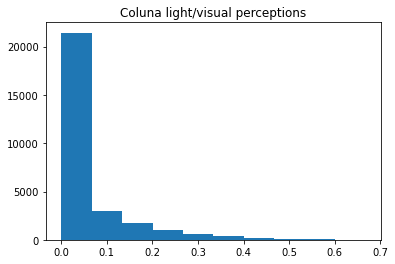

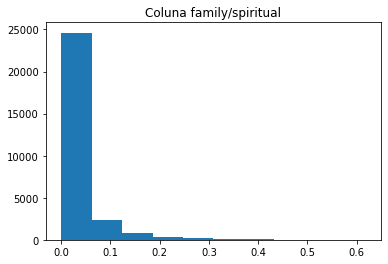

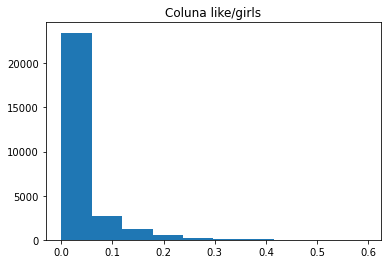

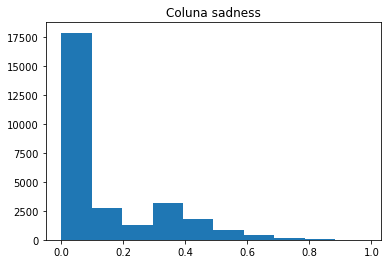

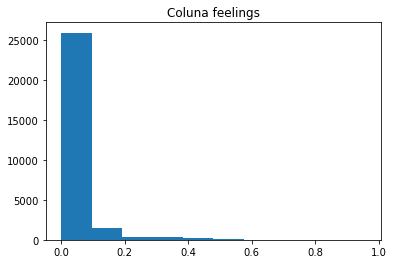

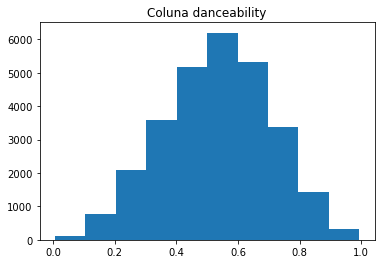

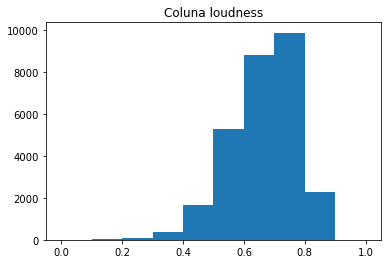

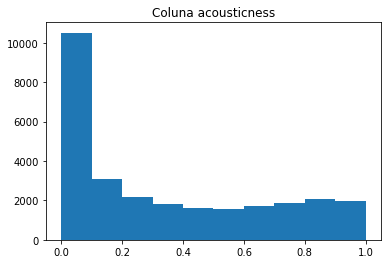

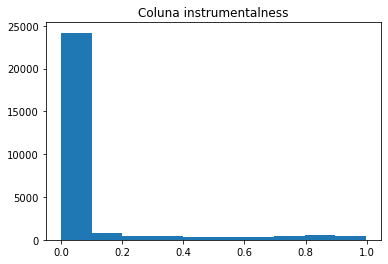

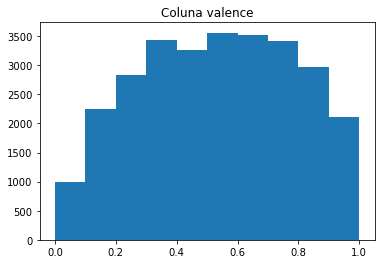

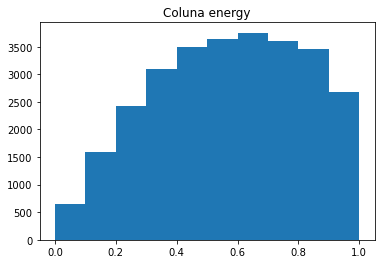

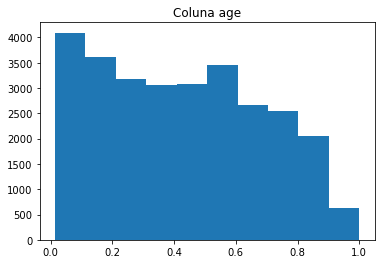

In [5]:
col_num = []
for i in df.columns:
    if isinstance(df[i][0], int) | isinstance(df[i][0], float):
        #print('oi')
        col_num.append(i)
        plt.hist(df[i])
        plt.title("Coluna {}".format(i))
        plt.show()

Text(0, 0.5, 'feelings')

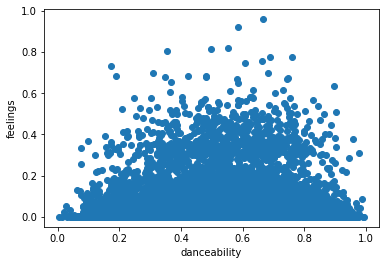

In [6]:
plt.scatter(df['danceability'],df['feelings'])
plt.xlabel("danceability")
plt.ylabel("feelings")

Text(0, 0.5, 'sadness')

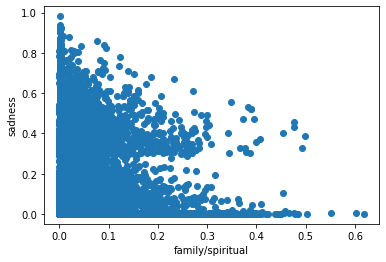

In [7]:
var1 = "family/spiritual"
var2 = "sadness"
plt.scatter(df[var1],df[var2])
plt.xlabel(var1)
plt.ylabel(var2)

## Criar variável alvo

In [8]:
df['topic'] = df['topic'].astype('category').cat.codes

In [9]:
df['topic'].value_counts()

5    6096
6    5710
7    5420
3    4882
1    2303
2    1825
4    1524
0     612
Name: topic, dtype: int64

## Modelagem

In [10]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [11]:
X = df[col_num]
y = df['topic']

In [12]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

#print(neigh.predict([[1.1]]))

#print(neigh.predict_proba([[0.9]]))

0.9657408712815452

## Ver palavra mais frequente na letra da música

In [14]:
from statistics import mode

test_list = df['lyrics'][16].split()

temp = [wrd for sub in test_list for wrd in sub.split()]
 
# getting frequency
res = mode(temp)
print(test_list,temp,res)

['blue', 'sky', 'smile', 'blue', 'sky', 'bluebirds', 'sing', 'song', 'bluebirds', 'long', 'shin', 'bright', 'things', 'go', 'right', 'notice', 'days', 'hurry', 'blue', 'days', 'go', 'blue', 'sky', 'blue', 'sky', 'smile', 'blue', 'sky', 'shin', 'bright', 'things', 'go', 'right', 'notice', 'days', 'hurry', 'blue', 'days', 'go', 'blue', 'sky', 'blue', 'sky'] ['blue', 'sky', 'smile', 'blue', 'sky', 'bluebirds', 'sing', 'song', 'bluebirds', 'long', 'shin', 'bright', 'things', 'go', 'right', 'notice', 'days', 'hurry', 'blue', 'days', 'go', 'blue', 'sky', 'blue', 'sky', 'smile', 'blue', 'sky', 'shin', 'bright', 'things', 'go', 'right', 'notice', 'days', 'hurry', 'blue', 'days', 'go', 'blue', 'sky', 'blue', 'sky'] blue


In [51]:
list_freq_words = []
for i in range(0,len(df['lyrics'])+1,1):
    print(i)
    test_list = df['lyrics'][i].split()

    temp = [wrd for sub in test_list for wrd in sub.split()]

    # getting frequency
    res = mode(temp)
    print(res)
    list_freq_words.append(res)

0
feel
1
believe
2
feel
3
kiss
4
till
5
run
6
think
7
speak
8
night
9
awhile
10
better
11
moon
12
like
13
away
14
carioca
15
smile
16
blue
17
death
18
say
19
little
20
breathe
21
feel
22
know
23
ring
24
wanna
25
letter
26
remember
27
fuck
28
fruit
29
hear
30
choice
31
hadn
32
kiss
33
yeah
34
world
35
world
36
call
37
begin
38
party
39
wonderful
40
want
41
raindrops
42
hyde
43
special
44
world
45
blue
46
save
47
bell
48
bell
49
granddad
50
hallelujah
51
distance
52
come
53
quanto
54
leave
55
heart
56
break
57
brazil
58
feel
59
jezebel
60
hound
61
sleep
62
tell
63
know
64
come
65
tequila
66
gucci
67
vive
68
heart
69
cold
70
temptation
71
time
72
word
73
run
74
go
75
magic
76
heart
77
lips
78
change
79
heart
80
ciao
81
dimenticar
82
mean
83
money
84
devil
85
house
86
give
87
know
88
word
89
free
90
remember
91
loove
92
spring
93
want
94
september
95
word
96
innamorata
97
dream
98
shit
99
lullaby
100
remember
101
blood
102
blue
103
say
104
angeliqueo
105
true
106
shame
107
warm
108
bring
1

life
951
satisfy
952
good
953
haïti
954
farewell
955
walk
956
gonna
957
hear
958
mind
959
asmiling
960
hush
961
lonely
962
forever
963
paradise
964
weary
965
lord
966
gonna
967
slack
968
fight
969
woman
970
come
971
popsicle
972
lovin
973
heart
974
ready
975
believe
976
fell
977
true
978
time
979
escape
980
somebody
981
home
982
little
983
yesterday
984
dream
985
theme
986
go
987
wrap
988
room
989
hurry
990
talk
991
leave
992
forget
993
hurt
994
lightning
995
jester
996
babe
997
warm
998
remember
999
home
1000
come
1001
long
1002
tell
1003
heart
1004
lie
1005
dead
1006
days
1007
care
1008
believe
1009
gladness
1010
walkin
1011
little
1012
seal
1013
trap
1014
city
1015
fade
1016
hard
1017
gonna
1018
good
1019
cover
1020
record
1021
think
1022
thank
1023
uhhoho
1024
slip
1025
monkees
1026
cast
1027
babe
1028
kiss
1029
distant
1030
tear
1031
remember
1032
touch
1033
hurt
1034
kick
1035
true
1036
know
1037
music
1038
fall
1039
winter
1040
hold
1041
home
1042
sweet
1043
love
1044
bang
1045


1756
things
1757
blank
1758
wowo
1759
world
1760
sweet
1761
real
1762
away
1763
hold
1764
leave
1765
cry
1766
tell
1767
write
1768
know
1769
tight
1770
memories
1771
child
1772
sleep
1773
know
1774
stay
1775
sing
1776
ring
1777
believe
1778
couldn
1779
woman
1780
union
1781
saddest
1782
live
1783
hotel
1784
private
1785
life
1786
eye
1787
believe
1788
word
1789
door
1790
headline
1791
leave
1792
gonna
1793
blue
1794
lullaby
1795
need
1796
ready
1797
live
1798
sake
1799
cold
1800
lonely
1801
slow
1802
know
1803
away
1804
days
1805
right
1806
bring
1807
halfbreed
1808
rainin
1809
best
1810
sweet
1811
come
1812
days
1813
dark
1814
secret
1815
away
1816
disillusion
1817
sixteen
1818
crash
1819
sing
1820
bogus
1821
thee
1822
time
1823
think
1824
remember
1825
hanky
1826
tell
1827
help
1828
teardrops
1829
time
1830
song
1831
child
1832
baby
1833
word
1834
eagle
1835
bluebird
1836
head
1837
call
1838
hold
1839
intone
1840
learn
1841
second
1842
waterloo
1843
mexico
1844
fall
1845
live
1846
go

2557
andante
2558
cold
2559
take
2560
best
2561
like
2562
enola
2563
fade
2564
dream
2565
electricity
2566
heaven
2567
ohwoahyayyay
2568
general
2569
go
2570
fade
2571
xanadu
2572
mystery
2573
fall
2574
roll
2575
say
2576
runnin
2577
teacher
2578
dreamin
2579
return
2580
plastic
2581
panorama
2582
nightporters
2583
forbid
2584
learn
2585
president
2586
minute
2587
hold
2588
livin
2589
straight
2590
alive
2591
hell
2592
know
2593
mean
2594
change
2595
learn
2596
paint
2597
leave
2598
away
2599
heart
2600
devil
2601
baby
2602
believe
2603
nausea
2604
dancin
2605
oohuh
2606
remember
2607
stop
2608
open
2609
feel
2610
believe
2611
heart
2612
laugh
2613
things
2614
soldier
2615
hole
2616
symbol
2617
trail
2618
yesterday
2619
heart
2620
sleep
2621
jezebel
2622
think
2623
jump
2624
reason
2625
live
2626
soul
2627
yesterday
2628
gang
2629
time
2630
feel
2631
wall
2632
second
2633
heart
2634
spellbind
2635
fit
2636
believe
2637
piss
2638
world
2639
away
2640
time
2641
night
2642
better
2643
out

3696
gonna
3697
gonna
3698
believe
3699
glorious
3700
long
3701
hard
3702
wish
3703
lench
3704
afraid
3705
think
3706
cause
3707
straight
3708
change
3709
live
3710
taste
3711
walk
3712
triangle
3713
baby
3714
wanna
3715
someday
3716
real
3717
fear
3718
kick
3719
away
3720
things
3721
disappear
3722
tonight
3723
know
3724
miracle
3725
vision
3726
away
3727
hold
3728
night
3729
compare
3730
fill
3731
take
3732
majesty
3733
talk
3734
beat
3735
secret
3736
leave
3737
russia
3738
large
3739
fall
3740
downtown
3741
grain
3742
skulls
3743
sister
3744
velouria
3745
dark
3746
modern
3747
high
3748
steal
3749
feel
3750
weird
3751
know
3752
hear
3753
pennywise
3754
know
3755
cold
3756
lose
3757
look
3758
sing
3759
wish
3760
like
3761
dream
3762
heart
3763
think
3764
black
3765
watch
3766
cold
3767
live
3768
hear
3769
love
3770
need
3771
free
3772
hide
3773
stand
3774
heart
3775
tango
3776
start
3777
late
3778
shin
3779
cause
3780
leave
3781
dancer
3782
daydream
3783
live
3784
fall
3785
live
3786

4668
break
4669
truth
4670
believe
4671
ready
4672
mind
4673
come
4674
runaway
4675
change
4676
loca
4677
ready
4678
bounce
4679
call
4680
play
4681
days
4682
away
4683
right
4684
home
4685
ones
4686
north
4687
party
4688
look
4689
sing
4690
promise
4691
wrong
4692
mind
4693
world
4694
mountains
4695
today
4696
niggas
4697
live
4698
world
4699
hurt
4700
deep
4701
long
4702
better
4703
think
4704
hate
4705
eye
4706
save
4707
question
4708
wish
4709
book
4710
rest
4711
best
4712
break
4713
wanna
4714
tomorrow
4715
time
4716
place
4717
wide
4718
tonight
4719
awake
4720
go
4721
tell
4722
know
4723
wanna
4724
anxious
4725
girls
4726
wanna
4727
forever
4728
fuck
4729
think
4730
want
4731
heart
4732
sweet
4733
pray
4734
time
4735
tonight
4736
long
4737
coldblooded
4738
sing
4739
like
4740
need
4741
determine
4742
sing
4743
deep
4744
life
4745
believe
4746
risk
4747
plan
4748
need
4749
good
4750
party
4751
turn
4752
hello
4753
cause
4754
believe
4755
space
4756
mirror
4757
baby
4758
heart
4759

5626
baby
5627
lovely
5628
like
5629
shake
5630
precious
5631
hurt
5632
sense
5633
body
5634
wish
5635
tell
5636
fall
5637
today
5638
stand
5639
leave
5640
night
5641
gonna
5642
alright
5643
like
5644
high
5645
look
5646
know
5647
dirty
5648
scar
5649
breathe
5650
winter
5651
want
5652
crawl
5653
fly
5654
hand
5655
pinstriped
5656
body
5657
come
5658
home
5659
believe
5660
fuck
5661
bitch
5662
nothin
5663
know
5664
money
5665
know
5666
hustla
5667
stand
5668
night
5669
oíche
5670
tire
5671
weezy
5672
walk
5673
heart
5674
fame
5675
yeah
5676
hide
5677
worry
5678
take
5679
ready
5680
fall
5681
bitch
5682
hold
5683
lose
5684
time
5685
walk
5686
time
5687
pushin
5688
troublemaker
5689
shut
5690
like
5691
follow
5692
music
5693
look
5694
club
5695
diva
5696
buzzin
5697
woah
5698
sleep
5699
bust
5700
like
5701
lovegame
5702
cold
5703
read
5704
give
5705
break
5706
chase
5707
away
5708
bedum
5709
feel
5710
misfitss
5711
know
5712
rush
5713
soul
5714
love
5715
night
5716
call
5717
ready
5718
w

6690
know
6691
good
6692
everyday
6693
shit
6694
years
6695
death
6696
go
6697
night
6698
know
6699
shit
6700
look
6701
flex
6702
saucin
6703
know
6704
yeah
6705
oooh
6706
million
6707
light
6708
cause
6709
like
6710
sing
6711
talkin
6712
smoke
6713
want
6714
fall
6715
twiddlin
6716
good
6717
thinkin
6718
hurt
6719
feet
6720
sick
6721
memories
6722
true
6723
damn
6724
fuck
6725
wavy
6726
time
6727
niggas
6728
overwhelm
6729
digits
6730
amaze
6731
damn
6732
like
6733
love
6734
guillotine
6735
steal
6736
yeah
6737
baby
6738
oooh
6739
work
6740
wall
6741
hand
6742
cold
6743
away
6744
away
6745
advice
6746
alive
6747
yeah
6748
insecure
6749
come
6750
getaway
6751
wanna
6752
pull
6753
ways
6754
know
6755
wanna
6756
love
6757
know
6758
look
6759
ohohoh
6760
good
6761
fall
6762
promise
6763
boys
6764
leave
6765
havana
6766
like
6767
move
6768
mind
6769
blue
6770
imma
6771
today
6772
drug
6773
fuck
6774
crazy
6775
migos
6776
save
6777
like
6778
fuck
6779
like
6780
guap
6781
perfect
6782
blow
6

7464
straight
7465
leave
7466
certain
7467
little
7468
remember
7469
lonesome
7470
cold
7471
satisfy
7472
wrong
7473
break
7474
second
7475
long
7476
lay
7477
easy
7478
reach
7479
sing
7480
cheatin
7481
know
7482
goodbye
7483
city
7484
time
7485
lonely
7486
jailhouse
7487
heartaches
7488
cheatin
7489
remember
7490
desire
7491
help
7492
accidentally
7493
real
7494
leave
7495
undo
7496
comancheros
7497
lonely
7498
fool
7499
blue
7500
darling
7501
break
7502
heart
7503
watch
7504
know
7505
change
7506
paint
7507
heart
7508
christmas
7509
house
7510
hear
7511
little
7512
star
7513
ring
7514
golden
7515
live
7516
comin
7517
havin
7518
good
7519
cry
7520
miss
7521
movin
7522
hill
7523
build
7524
everglades
7525
persuade
7526
bitch
7527
walk
7528
right
7529
fuck
7530
letter
7531
blue
7532
live
7533
life
7534
start
7535
home
7536
speak
7537
late
7538
wed
7539
clap
7540
shotgun
7541
cold
7542
walk
7543
forgive
7544
lonely
7545
sign
7546
fall
7547
little
7548
tell
7549
know
7550
kiss
7551
heart


like
8543
music
8544
heart
8545
magically
8546
fall
8547
lean
8548
time
8549
finals
8550
easy
8551
cause
8552
life
8553
hammer
8554
shut
8555
go
8556
stroker
8557
simple
8558
mississippi
8559
china
8560
change
8561
leave
8562
highway
8563
sing
8564
change
8565
cry
8566
take
8567
mind
8568
mind
8569
wait
8570
time
8571
yeah
8572
memory
8573
baby
8574
fool
8575
hold
8576
tonight
8577
release
8578
waitin
8579
stand
8580
black
8581
live
8582
baby
8583
believe
8584
go
8585
moment
8586
stand
8587
woman
8588
hold
8589
sing
8590
away
8591
know
8592
know
8593
know
8594
break
8595
away
8596
know
8597
dream
8598
night
8599
love
8600
place
8601
hunger
8602
spend
8603
blue
8604
walk
8605
morning
8606
sing
8607
hear
8608
share
8609
believe
8610
life
8611
yeah
8612
pull
8613
sittin
8614
ship
8615
heaven
8616
say
8617
lover
8618
baby
8619
away
8620
darlin
8621
roses
8622
bring
8623
lady
8624
go
8625
hold
8626
mind
8627
like
8628
send
8629
mexican
8630
houston
8631
tonight
8632
uncle
8633
window
8634
t

right
9738
tear
9739
time
9740
real
9741
like
9742
sutter
9743
home
9744
aall
9745
slowly
9746
blue
9747
leave
9748
wakin
9749
stone
9750
dadgum
9751
southern
9752
fall
9753
know
9754
color
9755
fool
9756
cause
9757
whisper
9758
heart
9759
stand
9760
deep
9761
time
9762
worlds
9763
headin
9764
reason
9765
leave
9766
hearts
9767
hand
9768
tonight
9769
send
9770
blue
9771
like
9772
say
9773
look
9774
money
9775
see
9776
cowboy
9777
write
9778
write
9779
look
9780
better
9781
world
9782
heart
9783
learn
9784
inch
9785
shame
9786
gettin
9787
machine
9788
come
9789
face
9790
thank
9791
start
9792
stay
9793
hold
9794
walk
9795
look
9796
blue
9797
heart
9798
like
9799
sake
9800
till
9801
hurt
9802
hold
9803
marriage
9804
key
9805
country
9806
fall
9807
texas
9808
mallee
9809
hopelessly
9810
rain
9811
stand
9812
comin
9813
true
9814
right
9815
lesson
9816
dream
9817
look
9818
time
9819
hold
9820
tear
9821
somebody
9822
unhappy
9823
ready
9824
life
9825
teach
9826
blue
9827
come
9828
money
9829

10571
reason
10572
cry
10573
live
10574
long
10575
feel
10576
home
10577
heart
10578
fool
10579
true
10580
saddle
10581
early
10582
unable
10583
choose
10584
oooooooo
10585
heart
10586
memory
10587
honky
10588
kick
10589
heart
10590
know
10591
change
10592
adios
10593
feel
10594
forget
10595
line
10596
goodbye
10597
time
10598
live
10599
heart
10600
burn
10601
stand
10602
wonder
10603
say
10604
voice
10605
little
10606
till
10607
theres
10608
change
10609
life
10610
wall
10611
familiar
10612
honky
10613
get
10614
come
10615
break
10616
tonight
10617
come
10618
come
10619
time
10620
like
10621
silver
10622
nobodysince
10623
like
10624
anybody
10625
comin
10626
love
10627
time
10628
fuss
10629
woods
10630
cocaine
10631
memory
10632
heart
10633
tonight
10634
go
10635
lonesome
10636
thrill
10637
hear
10638
world
10639
leave
10640
time
10641
close
10642
dream
10643
honest
10644
woman
10645
party
10646
lovin
10647
wish
10648
cub
10649
mexico
10650
moment
10651
bout
10652
cry
10653
come
10654

folks
11540
time
11541
thank
11542
crash
11543
fill
11544
burn
11545
good
11546
know
11547
louisiana
11548
batter
11549
walk
11550
home
11551
know
11552
goodbye
11553
home
11554
like
11555
live
11556
hear
11557
gonna
11558
gonna
11559
blue
11560
believe
11561
livin
11562
come
11563
life
11564
tell
11565
legend
11566
blood
11567
cross
11568
pills
11569
center
11570
away
11571
tonight
11572
better
11573
voice
11574
head
11575
prayer
11576
break
11577
people
11578
story
11579
hear
11580
fall
11581
leave
11582
nothin
11583
time
11584
away
11585
away
11586
bout
11587
team
11588
believe
11589
cold
11590
know
11591
world
11592
lonely
11593
county
11594
repeat
11595
hear
11596
stop
11597
damn
11598
look
11599
grow
11600
light
11601
want
11602
call
11603
lean
11604
stroll
11605
turn
11606
good
11607
sing
11608
stand
11609
matter
11610
want
11611
trust
11612
things
11613
blame
11614
life
11615
teardrop
11616
city
11617
think
11618
cover
11619
go
11620
live
11621
hear
11622
yeah
11623
silvery
116

lonely
12566
cause
12567
good
12568
thing
12569
lover
12570
spring
12571
sing
12572
till
12573
spring
12574
learn
12575
sinners
12576
alive
12577
marvelous
12578
easy
12579
solitude
12580
head
12581
gladly
12582
true
12583
moonglow
12584
live
12585
long
12586
jericho
12587
eye
12588
bother
12589
blue
12590
know
12591
time
12592
away
12593
cry
12594
moan
12595
cottage
12596
good
12597
good
12598
belong
12599
arm
12600
thou
12601
tree
12602
blood
12603
grave
12604
stay
12605
ring
12606
days
12607
feat
12608
heart
12609
blue
12610
little
12611
keepin
12612
baby
12613
columbus
12614
tell
12615
solitude
12616
stay
12617
spring
12618
good
12619
like
12620
dollars
12621
sentimental
12622
daydream
12623
mean
12624
savoy
12625
prelude
12626
song
12627
hear
12628
life
12629
soon
12630
dream
12631
come
12632
train
12633
care
12634
think
12635
away
12636
boogie
12637
stand
12638
bet
12639
blue
12640
blue
12641
early
12642
romance
12643
johansen
12644
scat
12645
upset
12646
speedoo
12647
tear
12648

13394
comin
13395
like
13396
blue
13397
yeah
13398
year
13399
feelin
13400
home
13401
voodoo
13402
yeah
13403
today
13404
kick
13405
yesterday
13406
want
13407
wall
13408
everyday
13409
know
13410
sing
13411
tonight
13412
feelin
13413
baby
13414
woman
13415
spoonful
13416
tonight
13417
lonesome
13418
remember
13419
animal
13420
mean
13421
people
13422
take
13423
shame
13424
livin
13425
know
13426
answer
13427
superstitious
13428
morning
13429
baby
13430
time
13431
judge
13432
live
13433
love
13434
look
13435
accuse
13436
inside
13437
go
13438
right
13439
yeah
13440
baby
13441
away
13442
know
13443
lose
13444
fly
13445
go
13446
like
13447
go
13448
slow
13449
bout
13450
high
13451
hear
13452
squank
13453
home
13454
want
13455
tell
13456
open
13457
sit
13458
right
13459
vietnam
13460
rest
13461
give
13462
live
13463
baby
13464
cost
13465
go
13466
come
13467
stay
13468
guitar
13469
like
13470
get
13471
fool
13472
superstitious
13473
crosseyed
13474
soul
13475
time
13476
world
13477
like
13

voodoo
14211
turkey
14212
feel
14213
necklace
14214
pact
14215
rise
14216
primitive
14217
survivor
14218
take
14219
home
14220
renegade
14221
blue
14222
take
14223
bone
14224
hell
14225
stand
14226
want
14227
go
14228
fat
14229
presley
14230
time
14231
baby
14232
mexican
14233
like
14234
know
14235
life
14236
hold
14237
yohohole
14238
bullet
14239
today
14240
caper
14241
year
14242
away
14243
need
14244
train
14245
long
14246
feel
14247
hang
14248
leave
14249
fish
14250
want
14251
break
14252
help
14253
tomorrow
14254
everybody
14255
feel
14256
knock
14257
overhang
14258
darkness
14259
fall
14260
feel
14261
lose
14262
pop
14263
feel
14264
alive
14265
wait
14266
baloney
14267
adaptable
14268
river
14269
face
14270
soul
14271
baby
14272
ring
14273
nazis
14274
spanish
14275
fall
14276
black
14277
away
14278
heel
14279
shout
14280
tender
14281
devil
14282
lonely
14283
yeah
14284
go
14285
life
14286
think
14287
right
14288
hand
14289
free
14290
nice
14291
watch
14292
think
14293
cold
14294


white
15197
free
15198
sweet
15199
ready
15200
serve
15201
creole
15202
baby
15203
jazz
15204
shoewa
15205
sweat
15206
monkey
15207
dont
15208
bank
15209
heart
15210
know
15211
walk
15212
circle
15213
live
15214
home
15215
somebody
15216
come
15217
felt
15218
need
15219
heat
15220
fall
15221
hide
15222
break
15223
life
15224
ride
15225
gonna
15226
head
15227
lover
15228
lonely
15229
blame
15230
opposite
15231
evil
15232
play
15233
yeah
15234
moment
15235
radio
15236
fool
15237
commandments
15238
look
15239
blue
15240
call
15241
morning
15242
away
15243
feel
15244
give
15245
mystic
15246
want
15247
step
15248
song
15249
whip
15250
dengue
15251
feel
15252
hear
15253
remember
15254
confess
15255
fuck
15256
believe
15257
dear
15258
hand
15259
night
15260
eye
15261
ruler
15262
fall
15263
tell
15264
mind
15265
gyal
15266
mind
15267
tonight
15268
baby
15269
window
15270
leave
15271
lateral
15272
guyute
15273
good
15274
night
15275
remember
15276
underground
15277
crawl
15278
forever
15279
hig

16124
okay
16125
hand
16126
sweet
16127
away
16128
tryin
16129
levitate
16130
wish
16131
heart
16132
know
16133
hand
16134
streets
16135
home
16136
money
16137
fuck
16138
feel
16139
lord
16140
lonesome
16141
know
16142
bleedin
16143
saint
16144
messin
16145
place
16146
somethin
16147
like
16148
slowly
16149
fine
16150
someday
16151
stand
16152
head
16153
cover
16154
break
16155
death
16156
offer
16157
cockroach
16158
mind
16159
know
16160
gonna
16161
wrong
16162
hold
16163
night
16164
believe
16165
hurt
16166
love
16167
away
16168
open
16169
shall
16170
come
16171
sweet
16172
window
16173
place
16174
know
16175
unbroken
16176
come
16177
slowly
16178
time
16179
help
16180
know
16181
dead
16182
live
16183
hail
16184
complete
16185
dream
16186
go
16187
days
16188
pattern
16189
live
16190
bambalam
16191
mind
16192
tonight
16193
woman
16194
waste
16195
life
16196
cause
16197
underground
16198
play
16199
good
16200
good
16201
walk
16202
gonna
16203
blood
16204
greatest
16205
long
16206
come


long
17264
somebody
17265
leave
17266
like
17267
want
17268
dear
17269
tree
17270
count
17271
away
17272
moments
17273
days
17274
baby
17275
depend
17276
believe
17277
time
17278
fall
17279
true
17280
go
17281
dream
17282
daddy
17283
hate
17284
simple
17285
black
17286
afraid
17287
beautiful
17288
string
17289
soon
17290
come
17291
hear
17292
savannah
17293
blue
17294
away
17295
want
17296
nigga
17297
blue
17298
hard
17299
need
17300
spring
17301
like
17302
take
17303
know
17304
know
17305
strangers
17306
today
17307
place
17308
solitude
17309
cry
17310
mean
17311
world
17312
things
17313
foolish
17314
remember
17315
know
17316
nice
17317
hours
17318
hand
17319
wonder
17320
like
17321
cheat
17322
great
17323
romance
17324
romance
17325
remember
17326
reverie
17327
ryone
17328
keepin
17329
time
17330
deep
17331
change
17332
like
17333
habit
17334
hurt
17335
friends
17336
warm
17337
fool
17338
life
17339
look
17340
wish
17341
sure
17342
tonight
17343
laugh
17344
somebody
17345
nigga
1734

feel
18336
sheik
18337
long
18338
tear
18339
pull
18340
better
18341
midnight
18342
own
18343
blue
18344
time
18345
reggae
18346
gotta
18347
change
18348
know
18349
need
18350
niggas
18351
walk
18352
bikini
18353
dreamer
18354
good
18355
givin
18356
dear
18357
dubplate
18358
time
18359
rainbow
18360
dock
18361
takin
18362
baby
18363
worst
18364
share
18365
think
18366
dumbledore
18367
stay
18368
break
18369
live
18370
cry
18371
wish
18372
cause
18373
life
18374
away
18375
dead
18376
believe
18377
feel
18378
matter
18379
bone
18380
head
18381
good
18382
come
18383
sunlight
18384
sweet
18385
music
18386
fade
18387
heart
18388
prrretty
18389
winter
18390
things
18391
time
18392
begin
18393
sunday
18394
state
18395
leave
18396
gonna
18397
believe
18398
bitch
18399
money
18400
fool
18401
island
18402
time
18403
stranger
18404
know
18405
real
18406
know
18407
songs
18408
stop
18409
dodeoo
18410
bruh
18411
call
18412
fuck
18413
walk
18414
go
18415
bring
18416
leave
18417
rain
18418
time
18419

good
19344
cheeba
19345
heart
19346
come
19347
smoke
19348
long
19349
birdland
19350
dream
19351
come
19352
fall
19353
time
19354
cold
19355
fuck
19356
fuck
19357
confucious
19358
vision
19359
devil
19360
mystical
19361
livin
19362
lively
19363
machine
19364
summer
19365
believe
19366
fall
19367
nigga
19368
black
19369
riff
19370
world
19371
know
19372
love
19373
alive
19374
knees
19375
today
19376
fuck
19377
heart
19378
body
19379
know
19380
go
19381
better
19382
yeah
19383
cheeba
19384
niggas
19385
world
19386
like
19387
heart
19388
kitchen
19389
waitin
19390
shit
19391
like
19392
music
19393
give
19394
human
19395
watch
19396
shift
19397
prisoner
19398
like
19399
feel
19400
inside
19401
feel
19402
need
19403
woman
19404
change
19405
play
19406
obscura
19407
home
19408
smile
19409
time
19410
thrill
19411
idaho
19412
smile
19413
sane
19414
night
19415
memories
19416
like
19417
come
19418
shit
19419
view
19420
night
19421
common
19422
eye
19423
plug
19424
like
19425
science
19426
fear


real
20097
go
20098
like
20099
vampires
20100
yeah
20101
world
20102
speak
20103
highest
20104
little
20105
wind
20106
aftermath
20107
unify
20108
generations
20109
breaka
20110
life
20111
space
20112
sumthin
20113
truth
20114
swing
20115
like
20116
life
20117
memories
20118
shin
20119
linger
20120
state
20121
life
20122
gonna
20123
floor
20124
feel
20125
arrowheads
20126
mind
20127
till
20128
pain
20129
flash
20130
sound
20131
go
20132
tell
20133
kiss
20134
leave
20135
dance
20136
treaty
20137
weary
20138
stay
20139
like
20140
game
20141
time
20142
heart
20143
bleed
20144
better
20145
wait
20146
void
20147
lonely
20148
know
20149
leave
20150
feel
20151
reason
20152
know
20153
kitchen
20154
ghost
20155
whoa
20156
boogie
20157
hurt
20158
besame
20159
close
20160
away
20161
days
20162
time
20163
land
20164
close
20165
choose
20166
deep
20167
fuck
20168
numb
20169
shoot
20170
true
20171
life
20172
black
20173
heart
20174
fuck
20175
time
20176
like
20177
tell
20178
loveland
20179
nuff
2018

21179
gonna
21180
word
21181
gonna
21182
winter
21183
run
21184
police
21185
love
21186
fight
21187
guide
21188
years
21189
unnu
21190
call
21191
youth
21192
screwface
21193
go
21194
bongo
21195
fish
21196
natural
21197
live
21198
blame
21199
hallelujah
21200
miss
21201
dream
21202
take
21203
fuck
21204
away
21205
halfway
21206
identify
21207
freeze
21208
yeah
21209
love
21210
love
21211
days
21212
time
21213
time
21214
look
21215
boundaries
21216
true
21217
simmer
21218
give
21219
girl
21220
right
21221
right
21222
like
21223
lord
21224
blood
21225
leave
21226
live
21227
cold
21228
holy
21229
walk
21230
color
21231
behold
21232
learn
21233
yall
21234
look
21235
family
21236
rock
21237
come
21238
word
21239
phase
21240
lindo
21241
leave
21242
black
21243
kill
21244
want
21245
time
21246
basics
21247
music
21248
rejoice
21249
lord
21250
kill
21251
babylon
21252
heartache
21253
bitch
21254
whip
21255
yeah
21256
natural
21257
money
21258
life
21259
forget
21260
long
21261
sheep
21262
know

like
21953
pour
21954
shop
21955
dead
21956
fuck
21957
yeah
21958
peace
21959
tell
21960
come
21961
late
21962
mean
21963
shit
21964
pride
21965
operation
21966
black
21967
party
21968
gonna
21969
shoot
21970
shop
21971
gettin
21972
bout
21973
away
21974
days
21975
little
21976
know
21977
timba
21978
lawd
21979
change
21980
podía
21981
fruitcake
21982
cold
21983
problems
21984
curly
21985
feelin
21986
songs
21987
kingdom
21988
baby
21989
comin
21990
youts
21991
live
21992
little
21993
black
21994
monster
21995
black
21996
grow
21997
gruff
21998
years
21999
real
22000
struggle
22001
sell
22002
coast
22003
cell
22004
bwoy
22005
want
22006
take
22007
sing
22008
come
22009
rudeboy
22010
gonna
22011
trust
22012
night
22013
alright
22014
kill
22015
soul
22016
stop
22017
money
22018
lonely
22019
tree
22020
things
22021
sing
22022
cause
22023
start
22024
time
22025
whooey
22026
steal
22027
million
22028
mission
22029
want
22030
fresh
22031
steal
22032
pull
22033
forget
22034
yeah
22035
scar
22

learn
22975
go
22976
stand
22977
yeah
22978
fall
22979
chuck
22980
waste
22981
toxic
22982
night
22983
gyal
22984
strike
22985
mind
22986
want
22987
waste
22988
strike
22989
heart
22990
away
22991
road
22992
smile
22993
good
22994
remember
22995
people
22996
actin
22997
smoke
22998
forget
22999
like
23000
tell
23001
pull
23002
girl
23003
rebel
23004
come
23005
smoke
23006
shoot
23007
kill
23008
short
23009
crown
23010
fight
23011
come
23012
lose
23013
go
23014
devil
23015
hand
23016
walk
23017
rebel
23018
master
23019
bubble
23020
haile
23021
whoa
23022
morning
23023
bend
23024
shoot
23025
want
23026
hear
23027
head
23028
weary
23029
positive
23030
water
23031
life
23032
yeah
23033
tell
23034
time
23035
fall
23036
journey
23037
stick
23038
like
23039
go
23040
run
23041
believe
23042
world
23043
life
23044
life
23045
policeman
23046
richest
23047
come
23048
terrify
23049
right
23050
praise
23051
evil
23052
time
23053
traveller
23054
evolution
23055
sing
23056
away
23057
look
23058
like


23795
wintertime
23796
remember
23797
funky
23798
gotta
23799
world
23800
world
23801
massachusetts
23802
feel
23803
syncopate
23804
save
23805
heart
23806
go
23807
white
23808
feel
23809
hear
23810
queen
23811
daddy
23812
free
23813
play
23814
stand
23815
hear
23816
bring
23817
like
23818
say
23819
cry
23820
different
23821
hear
23822
mirror
23823
mean
23824
miss
23825
begin
23826
moon
23827
choogling
23828
gonna
23829
play
23830
suspicious
23831
money
23832
weight
23833
river
23834
write
23835
time
23836
blue
23837
song
23838
follow
23839
help
23840
sweet
23841
till
23842
pilot
23843
remember
23844
roll
23845
learn
23846
say
23847
love
23848
sweet
23849
time
23850
fall
23851
tangerine
23852
lonely
23853
smile
23854
come
23855
pity
23856
play
23857
bana
23858
sing
23859
fall
23860
know
23861
lovely
23862
shame
23863
stick
23864
lonesome
23865
lonesome
23866
believe
23867
tell
23868
things
23869
know
23870
true
23871
time
23872
southern
23873
home
23874
come
23875
people
23876
tonight


dream
24903
round
24904
leave
24905
crack
24906
fall
24907
tonight
24908
leave
24909
clap
24910
night
24911
hell
24912
sleep
24913
right
24914
devil
24915
devil
24916
ghoul
24917
reignition
24918
earth
24919
call
24920
rest
24921
trust
24922
sale
24923
halloween
24924
feel
24925
radio
24926
go
24927
limb
24928
straight
24929
night
24930
knife
24931
death
24932
slip
24933
roses
24934
live
24935
cumin
24936
come
24937
invisible
24938
gotta
24939
destination
24940
walk
24941
throw
24942
devil
24943
tonight
24944
touch
24945
seagull
24946
surrender
24947
live
24948
life
24949
like
24950
remember
24951
play
24952
remember
24953
eye
24954
radio
24955
come
24956
time
24957
life
24958
fast
24959
nothin
24960
live
24961
change
24962
walk
24963
remember
24964
shadow
24965
undead
24966
know
24967
turn
24968
save
24969
think
24970
forget
24971
time
24972
death
24973
fall
24974
know
24975
forever
24976
summer
24977
matter
24978
trap
24979
away
24980
work
24981
fool
24982
bigmouth
24983
hear
24984
b

heal
25760
demon
25761
face
25762
see
25763
need
25764
plane
25765
hand
25766
spot
25767
casualty
25768
bite
25769
better
25770
hole
25771
voodoo
25772
fuck
25773
reach
25774
feel
25775
come
25776
look
25777
dust
25778
distance
25779
arm
25780
bone
25781
felt
25782
time
25783
go
25784
dream
25785
away
25786
gimme
25787
paranoid
25788
heart
25789
sick
25790
surprise
25791
afraid
25792
imagine
25793
hold
25794
juggalo
25795
climb
25796
walk
25797
head
25798
hurrah
25799
train
25800
trust
25801
final
25802
feel
25803
fuck
25804
thou
25805
money
25806
remember
25807
take
25808
time
25809
curse
25810
away
25811
stay
25812
fool
25813
break
25814
away
25815
world
25816
solid
25817
care
25818
away
25819
life
25820
stick
25821
sight
25822
underneath
25823
fall
25824
time
25825
space
25826
need
25827
know
25828
come
25829
turn
25830
watch
25831
time
25832
feel
25833
yeah
25834
hell
25835
real
25836
mirror
25837
everlasting
25838
darkness
25839
phantom
25840
blitzkrieg
25841
sleep
25842
real
2584

better
26556
pain
26557
today
26558
better
26559
scream
26560
death
26561
decision
26562
hold
26563
like
26564
tell
26565
eye
26566
need
26567
go
26568
fence
26569
pin
26570
forgive
26571
dog
26572
tell
26573
away
26574
overcome
26575
magnificent
26576
tomorrows
26577
dirt
26578
jump
26579
spotlight
26580
believe
26581
sham
26582
start
26583
life
26584
wrong
26585
promise
26586
feel
26587
heart
26588
break
26589
matter
26590
lady
26591
world
26592
come
26593
things
26594
death
26595
know
26596
tenderness
26597
hear
26598
shake
26599
world
26600
heart
26601
cry
26602
feel
26603
moment
26604
truth
26605
heart
26606
love
26607
uhhuh
26608
dodododo
26609
forget
26610
cold
26611
give
26612
live
26613
heart
26614
glorious
26615
lose
26616
recess
26617
propeller
26618
away
26619
check
26620
believe
26621
gonna
26622
quiet
26623
life
26624
like
26625
wrong
26626
yeah
26627
miss
26628
cause
26629
remix
26630
flash
26631
tonight
26632
goodbye
26633
get
26634
deal
26635
promise
26636
shoot
26637


baby
27627
like
27628
white
27629
live
27630
hiphop
27631
know
27632
star
27633
nigga
27634
spit
27635
supersonic
27636
come
27637
superfreak
27638
sound
27639
blind
27640
like
27641
save
27642
like
27643
like
27644
everybody
27645
shit
27646
break
27647
girl
27648
away
27649
away
27650
like
27651
cost
27652
everybody
27653
yeah
27654
lose
27655
supersonic
27656
like
27657
lose
27658
know
27659
bitch
27660
music
27661
cause
27662
swear
27663
lose
27664
body
27665
inside
27666
shit
27667
brief
27668
original
27669
know
27670
bass
27671
like
27672
gangster
27673
like
27674
playin
27675
maybe
27676
ride
27677
depend
27678
yeah
27679
like
27680
everybody
27681
smifnwessun
27682
funny
27683
like
27684
shake
27685
preme
27686
niggaz
27687
play
27688
nigga
27689
niggaz
27690
bucktown
27691
nigga
27692
like
27693
everybody
27694
dddon
27695
comin
27696
cheat
27697
waan
27698
remember
27699
talk
27700
mean
27701
ironman
27702
today
27703
want
27704
think
27705
thang
27706
shit
27707
dash
27708


KeyError: 28372

In [52]:
list_freq_words

['feel',
 'believe',
 'feel',
 'kiss',
 'till',
 'run',
 'think',
 'speak',
 'night',
 'awhile',
 'better',
 'moon',
 'like',
 'away',
 'carioca',
 'smile',
 'blue',
 'death',
 'say',
 'little',
 'breathe',
 'feel',
 'know',
 'ring',
 'wanna',
 'letter',
 'remember',
 'fuck',
 'fruit',
 'hear',
 'choice',
 'hadn',
 'kiss',
 'yeah',
 'world',
 'world',
 'call',
 'begin',
 'party',
 'wonderful',
 'want',
 'raindrops',
 'hyde',
 'special',
 'world',
 'blue',
 'save',
 'bell',
 'bell',
 'granddad',
 'hallelujah',
 'distance',
 'come',
 'quanto',
 'leave',
 'heart',
 'break',
 'brazil',
 'feel',
 'jezebel',
 'hound',
 'sleep',
 'tell',
 'know',
 'come',
 'tequila',
 'gucci',
 'vive',
 'heart',
 'cold',
 'temptation',
 'time',
 'word',
 'run',
 'go',
 'magic',
 'heart',
 'lips',
 'change',
 'heart',
 'ciao',
 'dimenticar',
 'mean',
 'money',
 'devil',
 'house',
 'give',
 'know',
 'word',
 'free',
 'remember',
 'loove',
 'spring',
 'want',
 'september',
 'word',
 'innamorata',
 'dream',
 'shi

## Para gerar imagens

https://harishgarg.com/writing/guide-dall-e-api-in-python/

https://pypi.org/project/Python-DALLE/

In [59]:
lista2 = [1,5,8,9,12,45,2,4,7]

In [57]:
max_atual = 0

for i in lista:
    if i > max_atual:
        max_atual = i
        
max_atual

45

In [66]:
def maior_num(lista):
    max_atual = 0

    for i in lista:
        if i > max_atual:
            max_atual = i
            
    #print(max_atual)     
    return max_atual

In [68]:
resultado = maior_num(lista2)

In [69]:
resultado

45